# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [3]:
hospital_read_df.shape

(16860, 12)

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
clean_hospital_read_df.shape

(11578, 12)

In [6]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


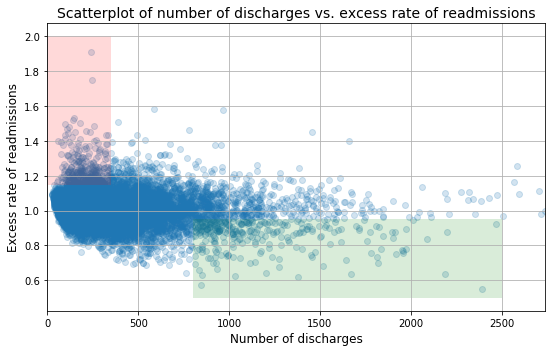

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [10]:
x = clean_hospital_read_df['Number of Discharges']
y = clean_hospital_read_df['Excess Readmission Ratio']
data_under100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
data_over1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
print(data_under100.shape, data_over1000.shape)

(1269, 12) (463, 12)


In [11]:
data_under100['Excess Readmission Ratio'].mean()

1.0226183501683506

In [12]:
np.sum(data_under100['Excess Readmission Ratio'] > 1) / len(data_under100['Excess Readmission Ratio'].dropna())

0.6321548821548821

In [13]:
data_over1000['Excess Readmission Ratio'].mean()

0.9783354211663071

In [14]:
np.sum(data_over1000['Excess Readmission Ratio'] > 1) / len(data_over1000['Excess Readmission Ratio'].dropna())

0.4449244060475162

In [15]:
temp = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
np.corrcoef(temp['Number of Discharges'], temp['Excess Readmission Ratio'])

array([[ 1.        , -0.09739794],
       [-0.09739794,  1.        ]])

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
I do not agree with the analysis and recommendations with following reasons:

* It is hard to say that the rate of readmissions is trending down with increasing number of discharges from the plot - we need to perform the statistical inference. 
* With lower number of discharges, there is not a greater incidence of excess rate of readmissions as there are more data points under the area shaded red.  Also with higher number of discharges, there is not a greater incidence of lower rates of readmissions as there are approximately same number of data points at the above of the area shaded green. 
* There is not a significant correlation between hospital capacity (number of discharges) and readmission rates with the observed correlation coefficient of -0.09739794, which is close to zero.  We do not know about that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions from the data - even thoug if there is a strong correlation between these two quantities, it does not explain about the causation.

### B1. Setup an appropriate hypothesis test
* TEST1: Testing the significance of correlation coefficient
    
    H0: There is no correlation between facilties' capacity and excess readmission ratio.
    
    H1: There is a significant correlation.
    

* TEST2: Testing the significance of slope of linear model
    
    H0: There is no tend in excess readmission ratio with the change of facilties' capacity
    
    H1: There is a negative trend.
    

* Method: Paired bootstrap hypothesis test  

### B2. Compute and report the observed significance value (or p-value)
### Pearson's correlation coefficient

In [16]:
# New variables
temp = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
temp = temp[temp['Number of Discharges'] <= 3000]
num_discharge = temp['Number of Discharges']
readmission_rate = temp['Excess Readmission Ratio']

# Pearson's r from the data
obs_r = np.corrcoef(num_discharge, readmission_rate)[0, 1]
print("Pearson's correlation coefficient of data: {}".format(obs_r))

Pearson's correlation coefficient of data: -0.0930955428759044


In [17]:
# Function for bootstrap replicates in pair
def bs_reps_r(x, y, size = 1):
    inds = np.arange(len(x))
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x.iloc[bs_inds], y.iloc[bs_inds]
        bs_reps[i] = np.corrcoef(bs_x, bs_y)[0, 1]
    
    return bs_reps

In [18]:
# Number of replicates 
num_reps = 100000

# Draw replicates for Pearson's r
bs_r_reps = bs_reps_r(num_discharge, readmission_rate, size = num_reps)

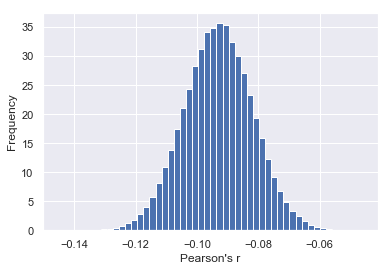

In [19]:
# Plot the histogram
sns.set()
_ = plt.hist(bs_r_reps, bins = 50, normed = True)
_ = plt.xlabel("Pearson's r")
_ = plt.ylabel('Frequency')
plt.show()

In [20]:
# Compute p-value
p = np.sum(bs_r_reps <= obs_r) / len(bs_r_reps) 
print('p-value from the bootstrap hypothesis test: ', p)

p-value from the bootstrap hypothesis test:  0.4992


### Slope of linear regression

In [21]:
# Function for bootstrap replicates of the slope of the linear regression
def bs_reps_linreg (x, y, size = 1):
    """Perform pairs bootstrap for linear regression."""
    inds = np.arange(len(x))
    
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x.iloc[bs_inds], y.iloc[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

In [22]:
# Observed splot of linear regression
obs_slope, obs_intercept = np.polyfit(num_discharge, readmission_rate, 1)

print("Slope of linear regressing from data: {}".format(obs_slope))

Slope of linear regressing from data: -2.8565052943819733e-05


In [23]:
# Number of replicates 
num_reps = 100000

# Draw replicates for linear regression 
bs_slope_reps, bs_intercept_reps = bs_reps_linreg(num_discharge, readmission_rate, size = num_reps)

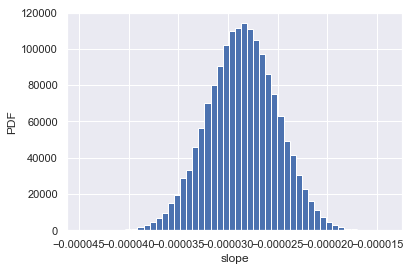

In [24]:
# Plot the histogram
sns.set()
_ = plt.hist(bs_slope_reps, bins = 50, normed = True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

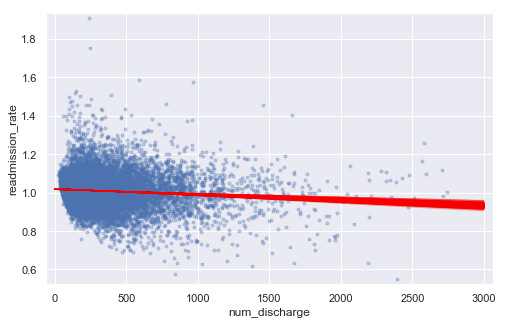

In [25]:
# Scatter plots with bootstrap replicates lines
fig, ax = plt.subplots(figsize=(8,5))
_ = plt.plot(num_discharge, readmission_rate, marker = '.', linestyle = 'none', alpha = .3)

x = np.array([0, 3000])
for i in range(1000):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i], 
                 linewidth =.5, alpha = .2, color = 'red')
    
_ = plt.xlabel('num_discharge')
_ = plt.ylabel('readmission_rate')
plt.margins(0.02)
plt.show()

In [26]:
# Compute p-value
p = np.sum(bs_slope_reps <= obs_slope) / len(bs_slope_reps) 
print('p-value from the bootstrap hypothesis test: ', p)

p-value from the bootstrap hypothesis test:  0.49937


### B3. Report statistical significance for α = 0.01
The p-value of 0.5 from the bootstrap hypothesis test for the correlation and linear regression is not significant under the the significance leve of 0.01. So we conclude that the null hypothesis should be retained, e.g. there does not seem to be a correlation between the number of discharges and the excess readmission ratio.

### B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance  measures these results against a set benchmark of how likely they could have happened by chance alone. Given a large enough sample, despite seemingly insignificant population differences, one might still find statistical significance. On the other hand, practical significance looks at whether the difference is large enough to be of value in a practical sense.  In my understanding of the definitions, we sould be aware about the significant statistical result does not always mean the significance in practice. From the example above, we have no significant statistical result, and so it is no meaning to consider the opposit case of practical significance.  In conclusion, we do not know about that the smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications, which lead to readmissions from the data. 
* reference: https://atrium.lib.uoguelph.ca/xmlui/bitstream/handle/10214/1869/A_Statistical_versus_Practical_Significance.pdf;sequence=7

